# Task 3

## 1. Extract and Load the Data
### Unzip the file, and use pandas to load each CSV into a DataFrame:

In [1]:
import pandas as pd

In [2]:
orders = pd.read_csv('orders.csv')


In [3]:
print(orders)

       order_id        date      time
0             1  2015-01-01  11:38:36
1             2  2015-01-01  11:57:40
2             3  2015-01-01  12:12:28
3             4  2015-01-01  12:16:31
4             5  2015-01-01  12:21:30
...         ...         ...       ...
21345     21346  2015-12-31  20:51:07
21346     21347  2015-12-31  21:14:37
21347     21348  2015-12-31  21:23:10
21348     21349  2015-12-31  22:09:54
21349     21350  2015-12-31  23:02:05

[21350 rows x 3 columns]


In [4]:
orders = pd.read_csv("orders.csv", encoding="latin1")
order_details = pd.read_csv("order_details.csv", encoding="latin1")
pizzas = pd.read_csv("pizzas.csv", encoding="latin1")
pizza_types = pd.read_csv("pizza_types.csv", encoding="latin1")

## 2. Join the DataFrames
### Use appropriate keys to join the data:

In [5]:
merged = order_details.merge(pizzas, on="pizza_id")
merged = merged.merge(pizza_types, on="pizza_type_id")
merged = merged.merge(orders, on="order_id")

## 3. Perform Analysis
### Then you can answer the following:
### * Total Revenue:

In [6]:
total_revenue = (merged['price'] * merged['quantity']).sum()

### * Total Quantity Sold:

In [7]:
total_quantity = merged['quantity'].sum()

### * Total Orders:

In [8]:
total_orders = orders['order_id'].nunique()

### * Pizza Types Count:

In [9]:
pizza_type_count = pizza_types['pizza_type_id'].nunique()

### * Average Pizza Price:

In [10]:
average_price = pizzas['price'].mean()

### * Peak Sales Hours:

<Axes: xlabel='hour'>

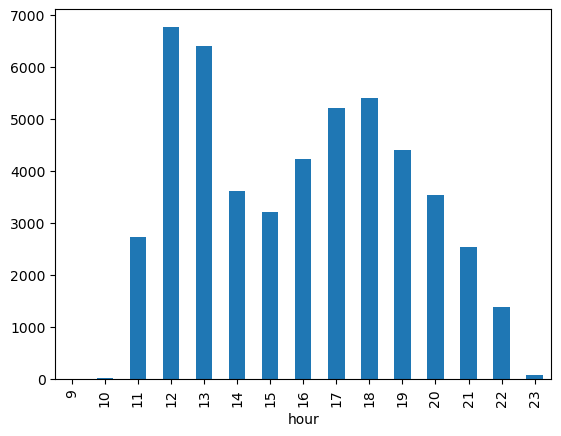

In [11]:
orders['time'] = pd.to_datetime(orders['time'], format='%H:%M:%S')
orders['hour'] = orders['time'].dt.hour
hourly_sales = orders.merge(order_details, on='order_id')
hourly_sales['hour'] = pd.to_datetime(hourly_sales['time'], format='%H:%M:%S').dt.hour
hourly_sales.groupby('hour')['quantity'].sum().plot(kind='bar')

### * Sales by Day of Week:

In [12]:
orders['date'] = pd.to_datetime(orders['date'])
orders['day_of_week'] = orders['date'].dt.day_name()
day_sales = orders.merge(order_details, on='order_id')
day_sales['sales'] = day_sales['quantity'] * merged['price']
day_sales.groupby('day_of_week')['sales'].sum().sort_values(ascending=False)

day_of_week
Friday       136073.90
Thursday     123528.50
Saturday     123182.40
Wednesday    114408.40
Tuesday      114133.80
Monday       107329.55
Sunday        99203.50
Name: sales, dtype: float64

### * Top 5 Bestselling Pizzas:

In [13]:
merged.groupby('pizza_type_id')['quantity'].sum().sort_values(ascending=False).head(5)

pizza_type_id
classic_dlx    2453
bbq_ckn        2432
hawaiian       2422
pepperoni      2418
thai_ckn       2371
Name: quantity, dtype: int64

### * Monthly Sales Trend:

<Axes: xlabel='month'>

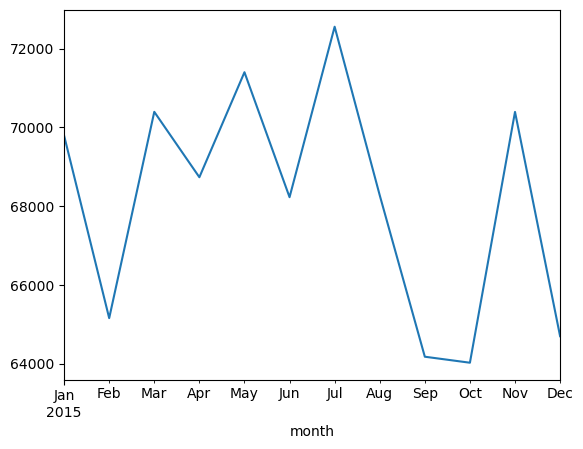

In [14]:
orders['month'] = orders['date'].dt.to_period('M')
monthly_sales = orders.merge(order_details, on='order_id')
monthly_sales['sales'] = monthly_sales['quantity'] * merged['price']
monthly_sales.groupby('month')['sales'].sum().plot(kind='line')

### * Underperforming Pizza Types:

In [15]:
merged.groupby('pizza_type_id')['quantity'].sum().sort_values().head(5)

pizza_type_id
brie_carre      490
mediterraneo    934
calabrese       937
spinach_supr    950
soppressata     961
Name: quantity, dtype: int64